In [2]:
import nbimporter
import numpy as np
import random
import time
import math

from chromosome import Chromosome
from evol_manager_s1 import EvolManager

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def __init__(  
> self,  
        genes_per_chrom,  
        pop,  
        generations,  
        reproductive_pool_size = None,  
        offspring = None,  
        mutation_rate = 0.2,  
        reproductive_coefficient = 1 / 3,
        ):

# Fitness distribution

## Initial distribution

In [185]:
evol_manager = EvolManager(
    genes_per_chrom = 12, 
    pop = 1000, 
    generations = 200, 
    reproductive_pool_size = None,
    offspring = 500)


It's populated over here!


In [186]:
chromosomes = evol_manager.get_chrom_array()

In [187]:
df = pd.DataFrame([], columns = ['generation', 'positions', 'fitness'])
df

for c, chro in enumerate(chromosomes):
    df.loc[ c ] = [0, chro.get_positions(), chro.fitness()]

df.head()

,generation,positions,fitness
0,0,"[3, 6, 4, 2, 7, 10, 11, 0, 8, 5, 9, 1]",0.909091
1,0,"[0, 4, 5, 11, 10, 9, 2, 3, 1, 7, 8, 6]",0.909091
2,0,"[0, 2, 6, 10, 7, 9, 1, 5, 11, 3, 4, 8]",0.909091
3,0,"[2, 11, 10, 3, 1, 7, 8, 4, 9, 6, 5, 0]",0.833333
4,0,"[0, 8, 5, 3, 10, 6, 1, 7, 9, 2, 4, 11]",0.818182


In [188]:
df.describe()

,generation,fitness
count,1000.0,1000.000000
mean,0.0,0.881515
std,0.0,0.043041
min,0.0,0.651515
25%,0.0,0.863636
50%,0.0,0.893939
75%,0.0,0.909091
max,0.0,0.969697


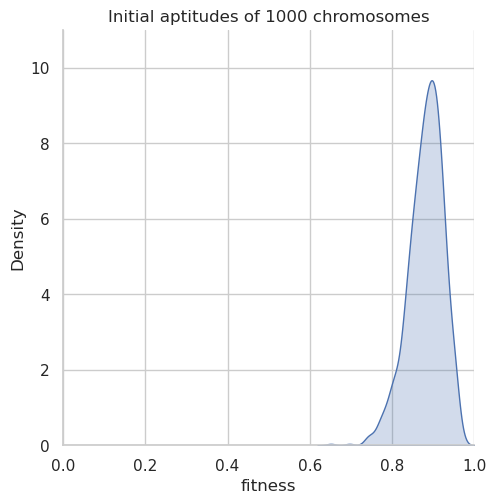

In [198]:
sns.displot(df, x="fitness", 
    kind="kde", 
    fill=True).set(title='Initial aptitudes of 1000 chromosomes',
        xlim = (0, 1),
        ylim = (0, 11))
plt.show()


## Final distribution

In [190]:
evol_manager.greedy_evolution()

It's populated over here!
Current generation: 0
self.__offspring_size: 500
Current generation: 1
self.__offspring_size: 500
Current generation: 2
self.__offspring_size: 500
Current generation: 3
self.__offspring_size: 500
Current generation: 4
self.__offspring_size: 500
Current generation: 5
self.__offspring_size: 500
Current generation: 6
self.__offspring_size: 500
Current generation: 7
self.__offspring_size: 500
Current generation: 8
self.__offspring_size: 500
Current generation: 9
self.__offspring_size: 500
Current generation: 10
self.__offspring_size: 500
Current generation: 11
self.__offspring_size: 500
Current generation: 12
self.__offspring_size: 500
SOLUTION FOUND: [ 5 10  2  4 11  1  8  6  0  3  7  9] Current generation: 13
SOLUTION FOUND: [ 5 10  2  4 11  1  8  6  0  3  7  9] SOLUTION FOUND: [ 5 10  2  4 11  1  8  6  0  3  7  9] SOLUTION FOUND: [ 5 10  2  4 11  1  8  6  0  3  7  9] Time for first solution:
3.3673406279995106
self.__offspring_size: 500
SOLUTION FOUND: [ 4  8  

In [191]:
evol_manager.show_solutions()

Solutions: 
solution [0]: [ 5 10  2  4 11  1  8  6  0  3  7  9].                     Generation: 13
solution [1]: [ 4  8  5 11  1  3  0  6  9  2 10  7].                     Generation: 14
solution [2]: [ 4  9  7 10  1  6  2  0  8 11  5  3].                     Generation: 19
solution [3]: [ 0 10  7  5  8 11  1  3  9  6  4  2].                     Generation: 20
solution [4]: [ 2  6  9  1  8  5  3 10  0  4 11  7].                     Generation: 20
solution [5]: [ 1  6  4  7 11  0  3 10  8  5  2  9].                     Generation: 21
solution [6]: [ 1  6  4  9  0  8  3 11  2  7  5 10].                     Generation: 21
solution [7]: [ 4  9  1  5 10  2  0  8 11  7  3  6].                     Generation: 24
solution [8]: [ 2  9  1  4 10  8  6 11  3  0  7  5].                     Generation: 28
solution [9]: [ 2  5  7  0  4 11  9  6  3 10  8  1].                     Generation: 29
solution [10]: [ 2  8 10  7  1  3  5  0 11  9  4  6].                     Generation: 29
solution [11]: [ 3 

In [192]:
final_chromosomes = evol_manager.get_chrom_array()

In [193]:
df_final = pd.DataFrame([], columns = ['generation', 'positions', 'fitness'])
df_final

for c, chro in enumerate(chromosomes):
    df_final.loc[ c ] = [0, chro.get_positions(), chro.fitness()]

df_final.head()

,generation,positions,fitness
0,0,"[1, 6, 8, 11, 10, 2, 7, 0, 9, 3, 4, 5]",0.803030
1,0,"[2, 6, 0, 7, 10, 3, 11, 4, 8, 1, 9, 5]",0.924242
2,0,"[3, 9, 8, 6, 1, 10, 7, 0, 11, 4, 2, 5]",0.924242
3,0,"[2, 0, 7, 5, 1, 3, 8, 9, 6, 4, 11, 10]",0.833333
4,0,"[0, 8, 1, 7, 5, 3, 9, 6, 2, 11, 4, 10]",0.909091


In [194]:
df_final.describe()

,generation,fitness
count,1000.0,1000.000000
mean,0.0,0.885045
std,0.0,0.040801
min,0.0,0.696970
25%,0.0,0.863636
50%,0.0,0.893939
75%,0.0,0.909091
max,0.0,0.984848


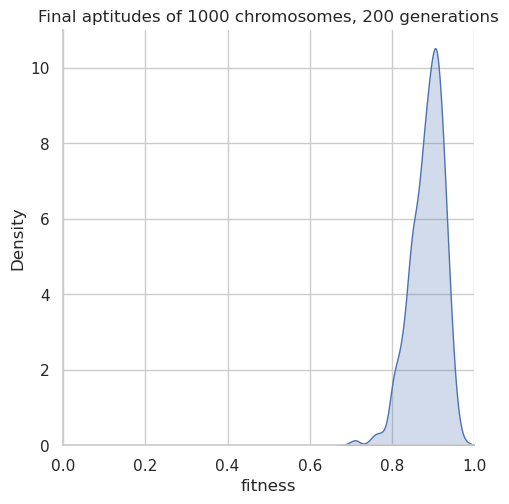

In [199]:
sns.displot(df_final['fitness'], #, x="fitness", 
    kind="kde",
    fill=True).set(title='Final aptitudes of 1000 chromosomes, 200 generations',
        xlim = (0, 1),
        ylim = (0, 11))

plt.show()